<a href="https://colab.research.google.com/github/syedamaann/Q-Learning-Agent-for-Frozen-Lake-Navigation/blob/main/Q_Learning_Agent_for_Frozen_Lake_Navigation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install gym matplotlib

import gym
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Load the environment
env = gym.make('FrozenLake-v1', new_step_api=True)

# Constants for the Q-learning algorithm
STATES = env.observation_space.n
ACTIONS = env.action_space.n
EPISODES = 1500  # number of times to run the environment from the beginning
MAX_STEPS = 100  # max number of steps allowed for each run of the environment
LEARNING_RATE = 0.81  # learning rate
GAMMA = 0.96  # discount factor


In [5]:
# Initialize the Q-table
Q = np.zeros((STATES, ACTIONS))
epsilon = 0.9  # probability of choosing a random action

# Function to pick an action
def choose_action(state, epsilon):
    if np.random.uniform(0, 1) < epsilon:
        return env.action_space.sample()  # take random action
    else:
        return np.argmax(Q[state, :])  # use Q table to pick best action

# Function to update the Q values
def update_q_table(state, action, reward, next_state):
    predict = Q[state, action]
    target = reward + GAMMA * np.max(Q[next_state, :])
    Q[state, action] = Q[state, action] + LEARNING_RATE * (target - predict)

In [17]:
rewards = []
for episode in range(EPISODES):
    state = env.reset()
    for _ in range(MAX_STEPS):
        action = choose_action(state, epsilon)
        new_state, reward, done, info, extra_value = env.step(action)
        update_q_table(state, action, reward, new_state)
        state = new_state
        if done:
            break
    rewards.append(reward)
    epsilon -= 0.001  # decrease epsilon

print(f"Average reward: {sum(rewards) / len(rewards)}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Average reward: 0.31


[[3.11474912e-01 1.58718429e-02 1.62822717e-02 1.61392149e-02]
 [5.12306062e-03 6.14314838e-03 3.52044710e-03 2.10396768e-01]
 [7.34603322e-03 5.88524094e-03 8.09617899e-03 2.73242125e-01]
 [2.21031245e-03 3.31176610e-03 2.70447523e-03 1.24666525e-01]
 [4.81327094e-01 3.61077358e-03 2.97706480e-03 3.92989467e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [2.74128036e-01 7.54170709e-06 7.85385147e-06 8.43513039e-06]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.42970508e-03 7.25277490e-03 2.03055523e-03 3.87148752e-01]
 [7.29930414e-03 5.28195401e-01 8.25578698e-03 3.99072438e-03]
 [7.44910450e-01 2.45989560e-04 5.30727808e-04 3.77730171e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.99230290e-02 5.83938435e-02 8.46039489e-01 3.38190100e-02]
 [2.37048949e-01 9.83883604e-01 1.96894334e-01 2.36606427e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.000000

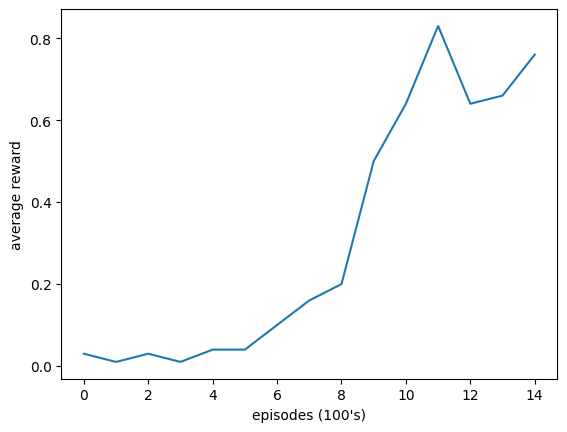

In [18]:
# Output the learned Q-table
print(Q)

# Function to calculate the average rewards
def get_average(values):
    return sum(values) / len(values)

# Plot the training progress
avg_rewards = [get_average(rewards[i:i + 100]) for i in range(0, len(rewards), 100)]
plt.plot(avg_rewards)
plt.ylabel('average reward')
plt.xlabel('episodes (100\'s)')
plt.show()